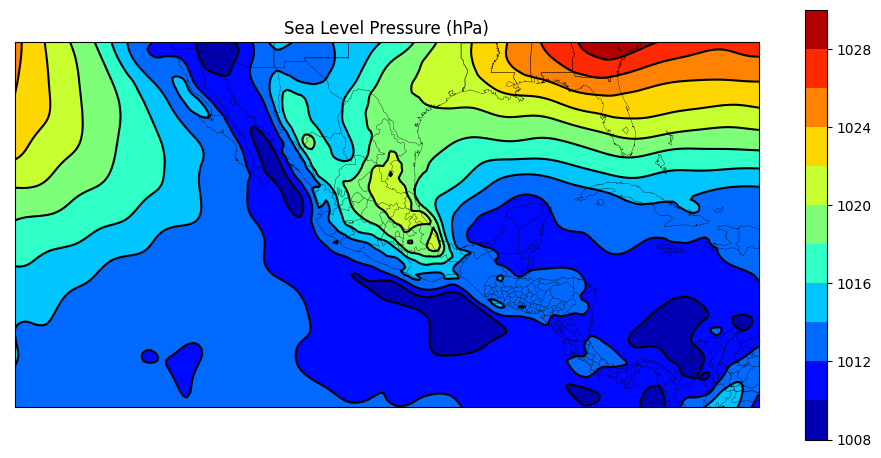

<Figure size 640x480 with 0 Axes>

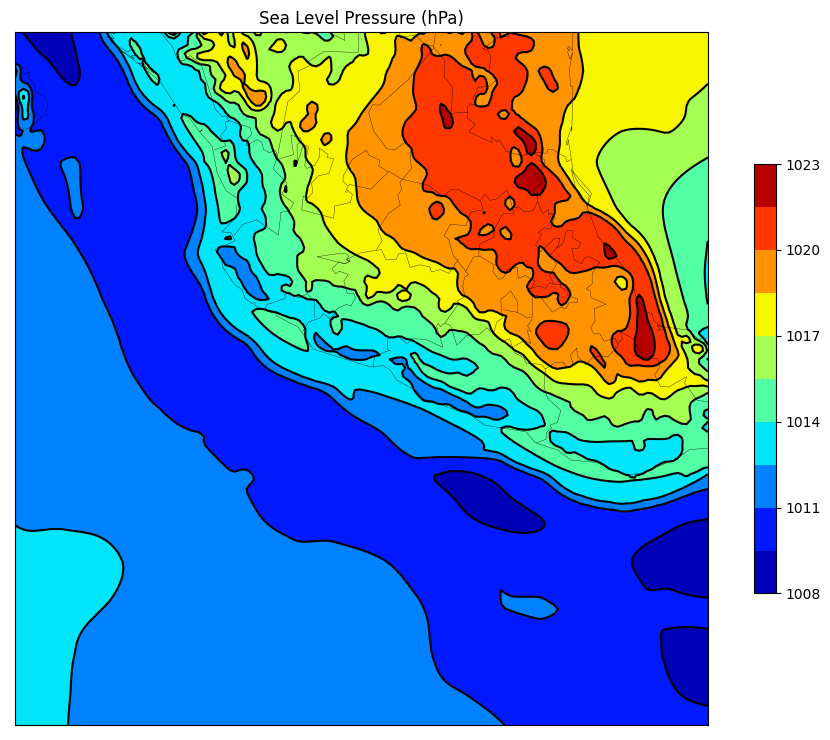

<Figure size 640x480 with 0 Axes>

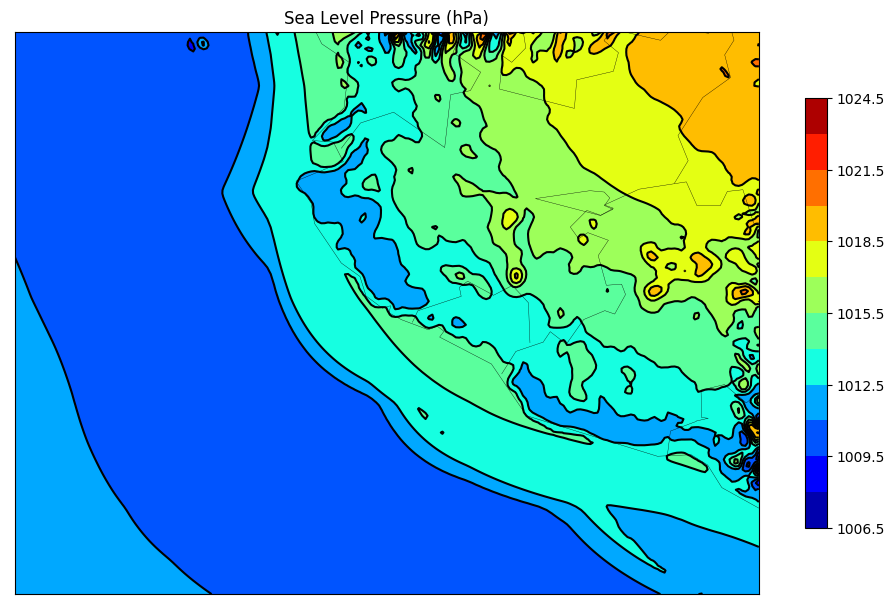

<Figure size 640x480 with 0 Axes>

In [8]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from mpl_toolkits.basemap import Basemap
import numpy as np

from wrf import to_np, getvar, smooth2d, get_basemap, latlon_coords

# Open the NetCDF file
dir = 'Data/'
filename = ['wrfout_d01_2015-10-20_06_00_00','wrfout_d02_2015-10-20_06_00_00','wrfout_d03_2015-10-20_06_00_00']

for i in range(len(filename)):
    ncfile = Dataset(dir+filename[i])

# Get the sea level pressure
    slp = getvar(ncfile, "slp")

# Smooth the sea level pressure since it tends to be noisy near the
# mountains
    smooth_slp = smooth2d(slp, 3, cenweight=4)

# Get the latitude and longitude points
    lats, lons = latlon_coords(slp)

# Get the basemap object
    bm = get_basemap(slp)

# Create a figure
    fig = plt.figure(figsize=(12,9))

# Add geographic outlines
    bm.drawcoastlines(linewidth=0.25)
    bm.drawstates(linewidth=0.25)
    bm.drawcountries(linewidth=0.25)

# Convert the lats and lons to x and y.  Make sure you convert the lats and
# lons to numpy arrays via to_np, or basemap crashes with an undefined
# RuntimeError.
    x, y = bm(to_np(lons), to_np(lats))

# Draw the contours and filled contours
    bm.contour(x, y, to_np(smooth_slp), 10, colors="black")
    bm.contourf(x, y, to_np(smooth_slp), 10, cmap=get_cmap("jet"))

# Add a color bar
    plt.colorbar(shrink=.62)

    plt.title("Sea Level Pressure (hPa)")
    plt.show()
    plt.savefig("slp"+filename[i])
    plt.clf()

In [21]:
dir = 'Data/'
filename = ['wrfout_d01_2015-10-20_06_00_00']

for i in range(len(filename)):
    ncfile = Dataset(dir+filename[i])

# Get the sea level pressure
    slp = getvar(ncfile, "slp")
min = (slp.min(dim="west_east"))
minimum = min.min(dim="south_north")

In [22]:
print (minimum)

<xarray.DataArray 'slp' ()>
array(1007.91254, dtype=float32)
Coordinates:
    XTIME    float32 0.0
    Time     datetime64[ns] 2015-10-20T06:00:00


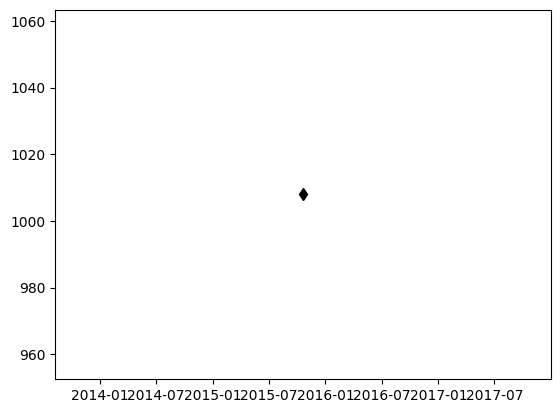

In [23]:
plt.plot(minimum.Time,minimum,'kd')